## Control 1: 14 de septiembre Joaquin Gutierrez

1. Utiliza la librería 'yfinance' y descarga precios 'Close' de 6 acciones 'AAPL','GOOG', 'MSFT','ALTR','WDC','KLAC‘ desde 1 de enero de 2022 hasta 1 de enero de 2023.


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance

In [2]:
# Define the stock symbol and date range
tickers = ['AAPL','GOOG', 'MSFT','ALTR','WDC','KLAC'] 
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# # Fetch data from Yahoo Finance
prices = yf.download(tickers, start=start_date, end=end_date).loc[:,'Close']

prices.head()



[*********************100%%**********************]  6 of 6 completed


,AAPL,ALTR,GOOG,KLAC,MSFT,WDC
Date,,,,,,
2022-01-03,182.009995,72.650002,145.074493,435.089996,334.750000,65.930000
2022-01-04,179.699997,71.190002,144.416504,431.239990,329.010010,67.620003
2022-01-05,174.919998,67.930000,137.653503,420.739990,316.380005,67.059998
2022-01-06,172.000000,68.750000,137.550995,432.220001,313.880005,64.739998
2022-01-07,172.169998,67.519997,137.004501,416.910004,314.040009,65.830002


Calcula los retornos, $\frac{𝑥_𝑡−𝑥_{𝑡−1}}{𝑥_{𝑡−1}}×100$ usando la funcion pct_change() y elminia la primera fila  


In [3]:
returns = prices.pct_change()
returns.head()

,AAPL,ALTR,GOOG,KLAC,MSFT,WDC
Date,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.012692,-0.020096,-0.004536,-0.008849,-0.017147,0.025633
2022-01-05,-0.026600,-0.045793,-0.046830,-0.024348,-0.038388,-0.008282
2022-01-06,-0.016693,0.012071,-0.000745,0.027285,-0.007902,-0.034596
2022-01-07,0.000988,-0.017891,-0.003973,-0.035422,0.000510,0.016837


In [4]:
returns = returns.iloc[1:, :] 
returns

,AAPL,ALTR,GOOG,KLAC,MSFT,WDC
Date,,,,,,
2022-01-04,-0.012692,-0.020096,-0.004536,-0.008849,-0.017147,0.025633
2022-01-05,-0.026600,-0.045793,-0.046830,-0.024348,-0.038388,-0.008282
2022-01-06,-0.016693,0.012071,-0.000745,0.027285,-0.007902,-0.034596
2022-01-07,0.000988,-0.017891,-0.003973,-0.035422,0.000510,0.016837
2022-01-10,0.000116,-0.008442,0.011456,0.004365,0.000732,-0.004405
...,...,...,...,...,...,...
2022-12-23,-0.002798,-0.011527,0.017562,0.009469,0.002267,-0.001632
2022-12-27,-0.013878,-0.015699,-0.020933,-0.016667,-0.007414,0.018960
2022-12-28,-0.030685,-0.000911,-0.016718,-0.009000,-0.010255,-0.030799


(a) Existe relación lineal entre los retornos de las 6 acciones consideradas? Cuáles acciones tienen la relación más fuerte y cuáles tienen la relación más débil? Explica tu respuesta (2 pts).

Si existe una relacion linela entre los retornos de las 6 acciones consideradas y las acciones con la relación más fuerte son AAPL y MSFT con una CORrelacion del 85%, mientras que las acciones con la relación más débil son ALTR y WDC con una correlacion de 53%.

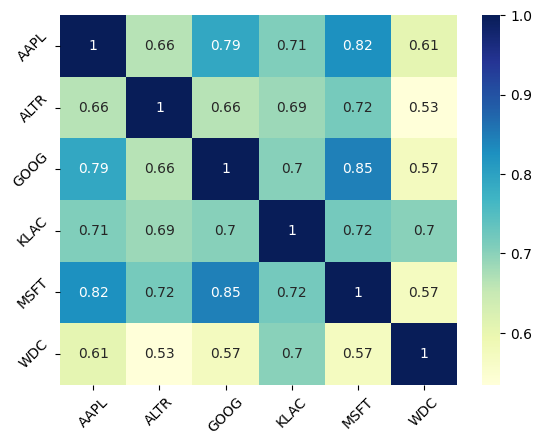

In [11]:
#Matriz de correlacion
correlation = returns.corr()

sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

(b) Calcula la matriz de covarianza de los retornos. Calcula los valores propios y vectores propios de la matriz de covarianza (2 pts). 

In [14]:
#Calcula la matriz de covarianza de los retornos
matriz_cov = returns.cov()
print(cov_matrix)

#valores propios y vectores propios de la matriz de covarianza
eig_vals, eig_vecs = np.linalg.eig(matriz_cov)
print(eig_vecs)

          AAPL      ALTR      GOOG      KLAC      MSFT       WDC
AAPL  0.000505  0.000367  0.000434  0.000490  0.000413  0.000409
ALTR  0.000367  0.000605  0.000400  0.000520  0.000393  0.000395
GOOG  0.000434  0.000400  0.000599  0.000529  0.000461  0.000422
KLAC  0.000490  0.000520  0.000529  0.000948  0.000495  0.000648
MSFT  0.000413  0.000393  0.000461  0.000495  0.000498  0.000383
WDC   0.000409  0.000395  0.000422  0.000648  0.000383  0.000902
[[-0.3572594  -0.22163936  0.34581075 -0.7699621   0.32722211 -0.06116112]
 [-0.36602711 -0.28048086  0.10822916  0.02962983 -0.49869752  0.72530266]
 [-0.38861836 -0.3329615   0.39596879  0.63480394  0.40025349 -0.1346931 ]
 [-0.51041006  0.14223662  0.01017458 -0.00173199 -0.58966321 -0.60945967]
 [-0.35993319 -0.32216312 -0.84260685 -0.0166807   0.23686986 -0.01694548]
 [-0.44417937  0.79832499 -0.04266458  0.05498314  0.28322003  0.28341648]]


(c) Calcula retornos para cada uno de los vectores propios. Existe relacion lineal entre los retornos de los vectores propios? Explica por qué (sin usar funciones de Python) (2 pts)

In [10]:
#calcular los retornos para cada uno de los vectores propios
eig_vecs_returns = returns.dot(eig_vecs)
eig_vecs_returns

,0,1,2,3,4,5
Date,,,,,,
2022-01-04,0.012955,0.034689,0.004905,0.008008,0.012470,-0.000240
2022-01-05,0.074387,0.036625,-0.000246,-0.010377,-0.001692,-0.012137
2022-01-06,0.006119,-0.020630,0.003651,0.010921,-0.039539,-0.016424
2022-01-07,0.018157,0.014360,-0.004676,-0.002835,0.033432,0.013850
2022-01-10,-0.001939,-0.004604,0.003278,0.006671,0.005185,-0.011595
...,...,...,...,...,...,...
2022-12-23,-0.006530,-0.002680,0.002994,0.012817,0.006353,-0.016827
2022-12-27,0.021593,0.029604,-0.009518,-0.001873,0.008351,0.007939
2022-12-28,0.039758,-0.009941,-0.007466,0.011480,-0.022123,0.000398


Existe relacion lineal entre los retornos de los vectores propios? Explica por qué (sin usar funciones de Python)       
No existe relacion lineal entre los retornos de los vectores propios, porque los vectores propios son ortogonales entre si. Los vectores propios son los autovectores de la matriz de covarianza, y los autovectores de una matriz simetrica siempre son ortogonales entre si.

2. Un pescador quiere medir la similitud entre dos peces de la misma especie utilizando solo la anchura (Width) y longitud (Height) de los peces, porque quiere clasificarlos en dos clases (grandes y pequeños) para su venta y poder así vender los grandes a mayor precio. Qué medida de distancia es la mejor para medir la similitud entre los peces? Explica por qué. (2 pts) En el set de datos de fish.csv, elige la especie 'Bream' y dos observaciones dentro de esta especie y calcula la medida de similitud que propones entre ellas usando solo el ancho (Width) y longitud (Height) de peces (2 pto).

Es mejor la distancia Mahalanovis ya que toma en cuenta la covarianza de los datos

In [55]:
DataFrame = pd.read_csv("fish.csv")
DataFrame.head()


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


In [72]:

#La matriz de covarianza se calcula con la función cov de numpy.
cov = np.cov(DataFrame[['Height','Width']], rowvar=False)
#Vectores de medidas de las columnas.
means = DataFrame[['Height','Width']].mean().values
#Vector de medidas de la especie Bream.
bream = DataFrame.loc[DataFrame['Species'] == 'Bream', ['Height','Width']].values[0]
#Calcular la distancia mahalanobis.
distance.mahalanobis(bream, means, cov)

#Calcular la distancia mahalanobis para cada fila
"""
mahalanobis = []
for i in range(len(bream.shape)):
    bream2 = DataFrame.loc[DataFrame['Species'] == 'Bream', ['Height','Width']].values[i]
    mahalanobis.append(distance.mahalanobis(bream2, means, cov))
print(mahalanobis)"""

[10.402291819666539, 14.891222191306525]


## Funciones

In [ ]:
pd.read_csv('filename.csv') # Leer el archivo de datos llamado 'filename.csv'
DataFrame.loc[DataFrame['columnname']== 'valor'] #  Seleccionar las filas de un DataFrame donde el valor en la columna 'columnname' es igual a 'valor'
DataFrame.loc[1] # Seleccionar la fila 1 del DataFrame
DataFrame.to_numpy() #Convierte el DataFrame a un numpy array
DataFrame.drop(['columnname1','columnname2'],axis=1,inplace=False) # Eliminar columnas 'columnname1', 'columnname2' sin reemplazar el DataFrame original.
np.linalg.inv(A) #Calcula la inversa de la matriz A
np.matmul(A,B) #Calcula el producto matricial entre A y B
DataFrame.corr() # Calcula la matriz de correlacion del DataFrame
DataFrame.cov() # Calcula la matriz de covarianza del DataFrame
sns.heatmap(data,vmax=1, vmin=-1,square=True, annot=True,cbar_kws={"shrink": .8},cmap ='Blues') #Graficar heatmap de data
eigenvalues, eigenvectors=np.linalg.eigh(A) #Calcula los autovalores y autovectores de la matriz A 
scipy.spatial.distance.mahalanobis(u, v, VI) #calcula la distancia mahalanobis entre dos vectores u y v donde VI es la inversa de la matriz de covarianza
